In [1]:
import pandas as pd
Amtrak = pd.read_csv("Amtrak.csv")
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
import numpy as np
p = Amtrak["Month"][0]
p[0:3]
Amtrak['months']= 0

In [2]:
for i in range(159):
    p = Amtrak["Month"][i]
    Amtrak['months'][i]= p[0:3]
    

<ipython-input-2-21aa23967567>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amtrak['months'][i]= p[0:3]
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [3]:
month_dummies = pd.DataFrame(pd.get_dummies(Amtrak['months']))
Amtrak1 = pd.concat([Amtrak,month_dummies],axis = 1)

In [4]:
Amtrak1["t"] = np.arange(1,160)

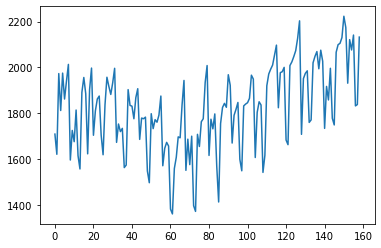

In [5]:
Amtrak1["t_squared"] = Amtrak1["t"]*Amtrak1["t"]
Amtrak1.columns
Amtrak1["log_Rider"] = np.log(Amtrak1["Ridership "])
Amtrak1.rename(columns={"Ridership ": 'Ridership'}, inplace=True)
Amtrak1.Ridership.plot()
Train = Amtrak1.head(147)
Test = Amtrak1.tail(12)

In [6]:
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13))


In [7]:
####################### L I N E A R ##########################

In [8]:
import statsmodels.formula.api as smf

In [9]:
linear_model = smf.ols('Ridership~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_linear))**2))
rmse_linear

209.92559265462594

In [10]:
##################### Exponential ##############################

In [11]:
Exp = smf.ols('log_Rider~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


217.05263566813534

In [12]:
#################### Quadratic ###############################

In [13]:
Quad = smf.ols('Ridership~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_Quad))**2))
rmse_Quad

137.15462741356416

In [14]:
################### Additive seasonality ########################

In [15]:
add_sea = smf.ols('Ridership~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_add_sea))**2))
rmse_add_sea

264.6643900568779

In [16]:
################## Additive Seasonality Quadratic ############################

In [17]:
add_sea_Quad = smf.ols('Ridership~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

50.60724584169758

In [18]:
################## Multiplicative Seasonality ##################

In [19]:
Mul_sea = smf.ols('log_Rider~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.1970325309221

In [20]:
##################Multiplicative Additive Seasonality ###########

In [21]:
Mul_Add_sea = smf.ols('log_Rider~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

172.76726784672434

In [22]:
################## Testing #######################################

In [23]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse
# so rmse_add_sea has the least value among the models prepared so far 
# Predicting new values 


,MODEL,RMSE_Values
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
2,rmse_Quad,137.154627
3,rmse_add_sea,264.664390
4,rmse_add_sea_quad,50.607246
5,rmse_Mult_sea,268.197033
6,rmse_Mult_add_sea,172.767268


In [24]:
predict_data = pd.read_csv("Predict_new.csv")
model_full = smf.ols('Ridership~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Amtrak1).fit()

In [25]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

0     2213.628216
1     2252.669534
2     2219.210851
3     2331.668836
4     2384.626820
5     2059.418138
6     2206.876122
7     2204.750773
8     2256.708757
9     2028.471300
10    1999.332467
11    2308.270556
dtype: float64

In [26]:
predict_data["forecasted_Ridership"] = pd.Series(pred_new)